# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
%matplotlib inline

# Read Audio Input

In [2]:
#Fs, data = read('25 The Letter J.wav')
#Fs, data = read('sendmorebaconjerk-high-slow.wav')
#Fs, data = read('sendmorebaconjerk-high.wav')
Fs, data = read('sendmorebaconjerk-low.wav')

# Clean audio
### Takes the audio data and finds the max for every n data points to make it easier to find dots and dashs.

In [3]:
max_height = max(data)

n = 20
tops = []
for index, sample in enumerate(data):
    if index % n == 0:
        tops.append(sample)
    else:
        if tops[int(index/n)] < sample:
            tops[int(index/n)] = sample    

### Since the array tops is n times smaller than the original data set this expands the data into new_data with the same length of the original data.

In [4]:
new_data = []
for top in tops:
    for i in range(n):
        # Removes some background noise
        if top > (max_height / 3) + (max_height / 4):
            new_data.append(top)
        else:
            new_data.append(0)

# Play Audio

### Original Audio 

In [5]:
Audio(data, rate=Fs)

### Modified Audio 

In [6]:
Audio(new_data, rate=Fs)

# Ploting the Audio

### Original Audio  

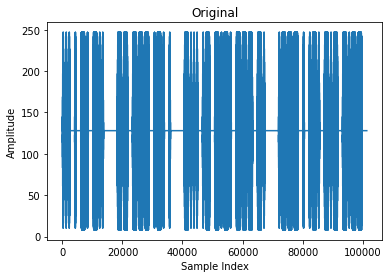

In [7]:
plt.figure()
plt.plot(data)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Original')
plt.show()

### Modified Audio 

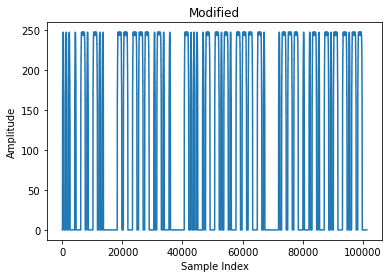

In [8]:
plt.figure()
plt.plot(new_data)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Modified')
plt.show()

# Find peaks
### Finds the peaks of new_data. The peaks will be used in order to find the length of the hump.

In [9]:
peaks = []
last_peak = 0
start = 0
end = 0
in_peak = False
counter = 0
for index, sample in enumerate(new_data):
    #print(sample)
    if in_peak:
        if sample == 0:
            end = index
            peaks.append([start, end])
            
            in_peak = False
    else:
        if sample != 0:
            start = index
            in_peak = True
        else:
            counter += 1

# Find length of peaks
### Finds the length of the peaks from the begining to the end. These lengths will be used in order to find out if the particular hump is a dot or a dash.

In [10]:
lengths = []
for peak in peaks:
    lengths.append(peak[1] - peak[0])

# Find max and min length of peaks

In [11]:
max_length = 0
for length in lengths:
    if max_length < length:
        max_length = length
print("Max Length:", max_length)

min_length = max_length
for length in lengths:
    if min_length > length:
        min_length = length
print("Min Length:", min_length)

Max Length: 1500
Min Length: 460


# Find character seperators

In [12]:
spaces = []
last = peaks[0][1];
for index, peak in enumerate(peaks):
    if index == 0:
        continue
    spaces.append([last, peak[0]])
    last = peak[1]

# Find length of character seperators

In [13]:
space_lengths = []
for space in spaces:
    space_lengths.append(space[1] - space[0])

# Find min and max length of character seperators

In [14]:
max_length_spaces = 0
for length in space_lengths:
    if max_length_spaces < length:
        max_length_spaces = length
print("Max Length of space:", max_length_spaces)

min_length_spaces = max_length_spaces
for length in space_lengths:
    if min_length_spaces > length:
        min_length_spaces = length
print("Min Length of space:", min_length_spaces)

Max Length of space: 4600
Min Length of space: 520


In [15]:
# if it is a small space than it does not matter
# if it is a larger space than it does matter because it is the start of a new character
seperators = []

for space_length in space_lengths:
    if space_length > min_length_spaces + min_length_spaces/5:
        seperators.append(" ")
    else:
        seperators.append("")
seperators.append("")

# Find min error and max error

In [16]:
min_error = abs((min_length * 2) - max_length)
max_error = abs((max_length / 2) - min_length)
error = min_error if min_error > max_error else max_error
print("Error:", error)

Error: 580


# Convert length of peaks to dashs and dots taking into account error

In [17]:
print("Message: ",end='')
for length, seperator in zip(lengths, seperators):
    if length < min_length + error + 1:
        print(".",end=seperator)
        # dot
    elif length > max_length - error - 1:
        print("-", end=seperator)
        # dash
    else:
        print(length)
        print(max_length - max_error)

Message: ... . -. -.. -- --- .-. . -... .- -.-. --- -. .--- . .-. -.- -.--

# Convert length of peaks into text taking into account error

## Morse Code Alphabet 

In [18]:
morse = {}
morse[".-"] = "A"
morse["-..."] = "B"
morse["-.-."] = "C"
morse["-.."] = "D"
morse["."] = "E"
morse["..-."] = "F"
morse["--."] = "G"
morse["...."] = "H"
morse[".."] = "I"
morse[".---"] = "J"
morse["-.-"] = "K"
morse[".-.."] = "L"
morse["--"] = "M"
morse["-."] = "N"
morse["---"] = "O"
morse[".--."] = "P"
morse["--.-"] = "Q"
morse[".-."] = "R"
morse["..."] = "S"
morse["-"] = "T"
morse["..-"] = "U"
morse["...-"] = "V"
morse[".--"] = "W"
morse["-..-"] = "X"
morse["-.--"] = "Y"
morse["--.."] = "Z"

In [19]:
print("Message: ",end='')
buffer = ""
for length, seperator in zip(lengths, seperators):
    if length < min_length + error + 1:
        buffer += "."
        
    elif length > max_length - error - 1:
        buffer += "-"
    
    if seperator == " ":
        print(morse[buffer], end="")
        buffer = ""

Message: SENDMOREBACONJERK